# Data Biases in Perspective API
In this assignment, we were tasked with finding biases in Perspective API. In the pro

## Exploring the labeled and scored dataset
For this section, I just explored the dataset by checking its attributes and general distribution as well as looking at different comments. 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
toxicity_data = pd.read_csv("labeled_and_scored_comments.csv")

In [2]:
toxicity_data.head()


,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0.450459,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0.667964,0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0.068434,0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0.151724,0,0,0,0,0,0


In [3]:
toxicity_data.tail()

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
41333,9480bff99f91a69e,Lesbian Teenager \nHow about the fact she was ...,0.797672,1,0,0,0,0,0
41334,9480115b93762c35,"Crack, also called cocaine is very good for yo...",0.240977,0,0,0,0,0,0
41335,947f206c14a85d9d,REDIRECT Talk:The Test (The O.C.),0.012671,0,0,0,0,0,0
41336,947e3f5f2d613605,A question concerning your edit to my user-pag...,0.227474,0,0,0,0,0,0
41337,94768f82798de227,Cited sources? I looked in Category:Abnormal p...,0.341041,0,0,0,0,0,0


In [4]:
toxicity_data.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,41338.000000,41338.000000,41338.000000,41338.000000,41338.000000,41338.000000,41338.000000
mean,0.244467,0.095384,0.009168,0.053050,0.003024,0.049809,0.009725
std,0.257221,0.293749,0.095313,0.224137,0.054907,0.217553,0.098134
min,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.128969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.998329,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


When reviewing the labeled and scored data set of around 41338 Wikipedia comments from Google's Jigsaw, one can see that the data consists of categorizing/analyzing a certain comment_text into a toxicity score from between 0 and 1 (float) with 0 or 1 (integer) for the other categories: toxic, severe-toxic, obscene, threat, insult, and identity_hate. Toxic, severe_toxic, and obscene are features that are somewhat related.

In [5]:
toxicity_data.index

RangeIndex(start=0, stop=41338, step=1)

In [6]:
sorted_comments = toxicity_data.sort_values('score')

In [7]:
sorted_comments.head()

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,61a85266de70cca0,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,030a9ba0b32b4456,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,a6814193ac6b4705,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,f0d6dee96e057a5b,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,cbb9268d3c7429c1,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0


In [8]:
sorted_comments.tail()

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0
17833,364b6c24210e2345,Fuck you you fucking pig!\n\nYou motherfucking...,0.998329,1,0,1,0,1,0


### Questions about Google Jigsaw's Dataset on Wikipedia Comments

It's hard to see a comment that would be **toxic but not obscene** so further exploration on this dataset is needed. Severe toxic and toxic are **thresholds** for the toxicity score (I haven't found the threshold for these categories but will try to subset the data to find it). **Threat, insult, and identity_hate** are also interesting features that I will work with later on with this exploration section. What constitutes as a threat, an insult, and identity_hate? What **keywords or similarities** in structure can be found in the comments that appear? Are there comments that don't fit into this binary categorization for threat, insult, and identity_hate - since theres **no distinct threshold** that toxic and severe_toxic have? Would that mean that any instance of the following would lead to this score of 1 or vice versa where it should have received a score? 

In [9]:
all_toxic_comments = toxicity_data.loc[toxicity_data['toxic'] == 1]
all_toxic_comments.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,3943.000000,3943.0,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.833664,1.0,0.096120,0.522698,0.029673,0.487700,0.095612
std,0.168672,0.0,0.294793,0.499548,0.169705,0.499912,0.294096
min,0.054399,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.771053,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.890928,1.0,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.954737,1.0,0.000000,1.000000,0.000000,1.000000,0.000000
max,0.998329,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
toxic_not_severe = toxicity_data.loc[(toxicity_data['toxic'] == 1) & (toxicity_data['severe_toxic'] == 0)]
print(toxic_not_severe)
toxic_not_severe.describe()

                     id                                       comment_text  \
8      00091c35fa9d0465  == Arabs are committing genocide in Iraq, but ...   
24     0013fed3aeae76b7  DJ Robinson is gay as hell! he sucks his dick ...   
29     0017d4d47894af05               :Fuck off, you anti-semitic cunt.  |   
37     001d739c97bc2ae4  How dare you vandalize that page about the HMS...   
38     001eff4007dbb65b  ::No, he is an arrogant, self serving, immatur...   
...                 ...                                                ...   
41297  94a6beeb87ab68c0               Damn, those are some rancid sources.   
41299  94a5024323152cd1  ==Why does it bother you, fuckface?89.123.100....   
41325  948cb4052152869b  WHAT?  That's past stuff.  Stop being an insti...   
41332  9481cd7393b583c9  RE: \n\nIt's a fucking album cover, how the fu...   
41333  9480bff99f91a69e  Lesbian Teenager \nHow about the fact she was ...   

          score  toxic  severe_toxic  obscene  threat  insult  

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,3564.000000,3564.0,3564.0,3564.000000,3564.000000,3564.000000,3564.000000
mean,0.819759,1.0,0.0,0.477273,0.025253,0.447531,0.079686
std,0.170981,0.0,0.0,0.499553,0.156913,0.497309,0.270844
min,0.054399,1.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.750617,1.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.878531,1.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.948086,1.0,0.0,1.000000,0.000000,1.000000,0.000000
max,0.998329,1.0,0.0,1.000000,1.000000,1.000000,1.000000


In [11]:
not_toxic = toxicity_data.loc[(toxicity_data['toxic'] == 0) & (toxicity_data['severe_toxic'] == 0)]
not_toxic.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,37395.000000,37395.0,37395.0,37395.000000,37395.000000,37395.000000,37395.000000
mean,0.182341,0.0,0.0,0.003530,0.000214,0.003637,0.000669
std,0.172263,0.0,0.0,0.059309,0.014625,0.060197,0.025848
min,0.000004,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.071054,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.112366,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.239749,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,0.982097,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [12]:
severe_not_toxic = toxicity_data.loc[(toxicity_data['toxic'] == 0) & (toxicity_data['severe_toxic'] == 1)]
severe_not_toxic.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
severe_toxic_comments = toxicity_data.loc[toxicity_data['severe_toxic'] == 1]
severe_toxic_comments.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,379.000000,379.0,379.0,379.000000,379.000000,379.000000,379.000000
mean,0.964424,1.0,1.0,0.949868,0.071240,0.865435,0.245383
std,0.046562,0.0,0.0,0.218506,0.257566,0.341709,0.430883
min,0.496129,1.0,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.959072,1.0,1.0,1.000000,0.000000,1.000000,0.000000
50%,0.977837,1.0,1.0,1.000000,0.000000,1.000000,0.000000
75%,0.989706,1.0,1.0,1.000000,0.000000,1.000000,0.000000
max,0.998136,1.0,1.0,1.000000,1.000000,1.000000,1.000000


In the following, I have seperated toxicity_data into four different dataframes: all_toxic_comments, toxic_not_severe,not_toxic, and severe_not_toxic. The dataframe, all_toxic_comments, represents the number of selected comments that had "1" under the category toxic. This amounted to around **3943** toxic comments or approximately **9.54%** of the entire data set. The dataframe, toxic_not_severe, referred to toxic comments that didn't have a "1" under the feature, severe_toxic. This amounted to **3564** comments or **90.39%** of all toxic comments. For clarification, I decided to subset comments that weren't toxic and got a total of **37395** which totaled to **41338** with the toxic ones. Before, I believed that the thresholds of severe_toxic always passed toxic comments. The following dataframe, severe_not_toxic, affirms that statement since there aren't any comments that are severely toxic but not toxic. 

In [14]:
sorted_nottoxic = not_toxic.sort_values('score')
sorted_nottoxic.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,37395.000000,37395.0,37395.0,37395.000000,37395.000000,37395.000000,37395.000000
mean,0.182341,0.0,0.0,0.003530,0.000214,0.003637,0.000669
std,0.172263,0.0,0.0,0.059309,0.014625,0.060197,0.025848
min,0.000004,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.071054,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.112366,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.239749,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,0.982097,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [15]:
sorted_nottoxic.max()

id                           ffff9d956986994e
comment_text     일이삼사오육칠팔구하고십이요 에헤헤 으헤 으헤 으허허
score                                0.982097
toxic                                       0
severe_toxic                                0
obscene                                     1
threat                                      1
insult                                      1
identity_hate                               1
dtype: object

It seems that there are some outliers in the dataset since the max appears to be **0.982097** but it's still classified as non toxic. The translated text is "One, three, four, five, six, seven, nine, and twelve" so perhaps the model isn't effective or is faulty to text in different languages. To understand more and to see if I could do a ballpark estimate for the threshold, I can create scatterplots for the non_toxic, toxic, and severe_toxic_comments. 

In [16]:
index = []
for i in range(1, len(sorted_nottoxic) + 1):
    index.append(i)
sorted_nottoxic["id"] = index


Replaced the id values with numerical values to plot the sorted values on a scatterplot. 

In [17]:
sorted_nottoxic.head()

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,1,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,2,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,3,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,4,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,5,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0


Text(0.5, 0, 'Index')

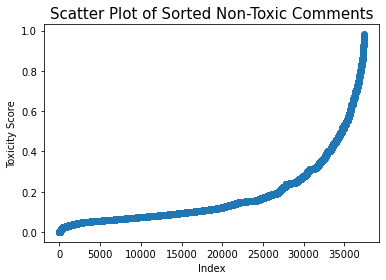

In [18]:
plt.scatter(sorted_nottoxic['id'], sorted_nottoxic['score'])
plt.title('Scatter Plot of Sorted Non-Toxic Comments', fontsize = 15)
plt.ylabel('Toxicity Score')
plt.xlabel('Index')

I couldn't really find any threshold to toxic and severe_toxic so I'll move onto using the density (bell curve) graph.

### Kernel Density Estimate Graphs

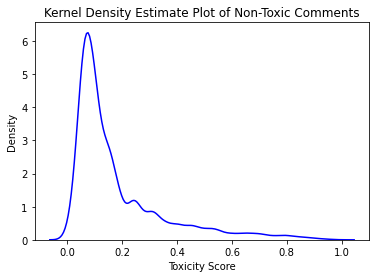

In [19]:
toxicity_nottoxic = list(sorted_nottoxic['score'])
ax = sns.kdeplot(data=toxicity_nottoxic, color="blue")
ax.set(xlabel='Toxicity Score', ylabel='Density', title="Kernel Density Estimate Plot of Non-Toxic Comments")
plt.show()


In [20]:
sorted_nottoxic.describe()

,id,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,37395.000000,37395.000000,37395.0,37395.0,37395.000000,37395.000000,37395.000000,37395.000000
mean,18698.000000,0.182341,0.0,0.0,0.003530,0.000214,0.003637,0.000669
std,10795.150995,0.172263,0.0,0.0,0.059309,0.014625,0.060197,0.025848
min,1.000000,0.000004,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,9349.500000,0.071054,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,18698.000000,0.112366,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,28046.500000,0.239749,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,37395.000000,0.982097,0.0,0.0,1.000000,1.000000,1.000000,1.000000


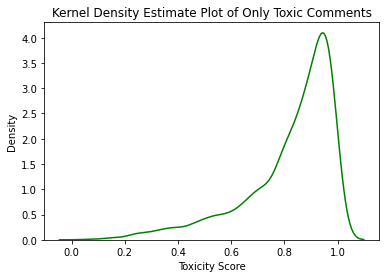

In [21]:
sorted_onlytoxic = toxic_not_severe.sort_values('score')
toxicity_onlytoxic = list(sorted_onlytoxic['score'])
ax2 = sns.kdeplot(data=toxicity_onlytoxic, color="green")
ax2.set(xlabel='Toxicity Score', ylabel='Density', title="Kernel Density Estimate Plot of Only Toxic Comments")
plt.show()

In [22]:
sorted_onlytoxic.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,3564.000000,3564.0,3564.0,3564.000000,3564.000000,3564.000000,3564.000000
mean,0.819759,1.0,0.0,0.477273,0.025253,0.447531,0.079686
std,0.170981,0.0,0.0,0.499553,0.156913,0.497309,0.270844
min,0.054399,1.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.750617,1.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.878531,1.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.948086,1.0,0.0,1.000000,0.000000,1.000000,0.000000
max,0.998329,1.0,0.0,1.000000,1.000000,1.000000,1.000000


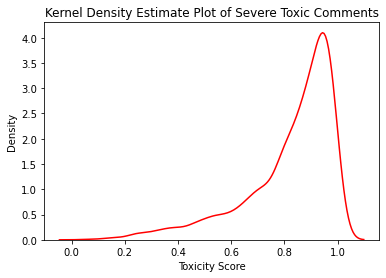

In [23]:
sorted_severetoxic = severe_toxic_comments.sort_values('score')
toxicity_severetoxic = list(sorted_severetoxic['score'])
ax3 = sns.kdeplot(data=toxicity_onlytoxic, color="red")
ax3.set(xlabel='Toxicity Score', ylabel='Density', title="Kernel Density Estimate Plot of Severe Toxic Comments")
plt.show()

In [24]:
sorted_severetoxic.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,379.000000,379.0,379.0,379.000000,379.000000,379.000000,379.000000
mean,0.964424,1.0,1.0,0.949868,0.071240,0.865435,0.245383
std,0.046562,0.0,0.0,0.218506,0.257566,0.341709,0.430883
min,0.496129,1.0,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.959072,1.0,1.0,1.000000,0.000000,1.000000,0.000000
50%,0.977837,1.0,1.0,1.000000,0.000000,1.000000,0.000000
75%,0.989706,1.0,1.0,1.000000,0.000000,1.000000,0.000000
max,0.998136,1.0,1.0,1.000000,1.000000,1.000000,1.000000


Although the max and min toxicity score values of the different datasets (non-toxic, toxic, severe toxic) range greatly, the KDE plots allow us to visualize the description of each sorted dataset. There is a certain threshold between non-toxic and the rest but the seperation of only toxic and severe toxic overlap to a point where there must be a different reason why they were categorized. However, my assumptions on how it would be generally skewed towards higher toxicity scores was affirmed by this. 

## Design and perform tests

### Implementing Perspective API

I used the sample code in the documentation of Perspective API under "Sample Requests" of "Enable the API" [Sample Requests](https://developers.perspectiveapi.com/s/docs-sample-requests).

In [35]:
from googleapiclient import discovery
import json

API_KEY = XXX

client = discovery.build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
  static_discovery=False,
)

analyze_request = {
  'comment': { 'text': 'hello people' },
  'requestedAttributes': {'TOXICITY': {}}
}

response = client.comments().analyze(body=analyze_request).execute()
print(json.dumps(response, indent=2))

{
  "attributeScores": {
    "TOXICITY": {
      "spanScores": [
        {
          "begin": 0,
          "end": 12,
          "score": {
            "value": 0.021102477,
            "type": "PROBABILITY"
          }
        }
      ],
      "summaryScore": {
        "value": 0.021102477,
        "type": "PROBABILITY"
      }
    }
  },
  "languages": [
    "en"
  ],
  "detectedLanguages": [
    "en"
  ]
}


In the test assignment #2, a function was created to speed up the process and extract the toxicity scores of the labeled dataset that we could create and play around with to make hypotheses. 

In [42]:
from googleapiclient import discovery
import json

API_KEY = XXX

def find_toxicity_score(comment): 
    client = discovery.build(
      "commentanalyzer",
      "v1alpha1",
      developerKey=API_KEY,
      discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
      static_discovery=False,
    )

    analyze_request = {
      'comment': { 'text': comment},
      'requestedAttributes': {'TOXICITY': {}}
    }

    response = client.comments().analyze(body=analyze_request).execute()
    toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
    return(toxicity_score)

In [44]:
find_toxicity_score("hello my name is ethan")

0.015132698

In [46]:
find_toxicity_score("hello my name is ethan, i am an undergraduate student at the University of Texas at Austin")

0.017701091

In [47]:
find_toxicity_score('you suck')

0.8960455

In [48]:
find_toxicity_score('일이삼사오육칠팔구하고십이요 에헤헤 으헤 으헤 으허허')

0.043646812

This result doesn't affirm the Google Jigsaw's dataset result that I pointed out before. Perhaps it can only analyze on English at the moment.

In [49]:
find_toxicity_score('엿먹어')

0.944597

In [53]:
find_toxicity_score("나는 꽃을 좋아한다")

0.030270588

In [ ]:
sorted_severetoxic.to_csv('severe_toxic_comments.csv', encoding='utf-8')

Although the correct translation/grammer might not be correct, it seems that Perspective API can deal with foriegn languages as well (the phrase above is unsavory and the phrase underneath it is "I like flowers")

Although my original hypothesis about the Perspective API was that comments from foriegn languages were marked as being toxic, it seems that the translation works and so my new hypothesis surronds context of comments and curse/bad words.  

From analyzing comments, I created an excel sheet with different types of comments, 70 of them. I believe that Perspective API puts too much weight on curse words compared to the actual comment itself. It's searching for a blacklist of words that could appended and weighed against each other rather than deseminating the text (obviously it does too a certain extent). In this modern climate, newer generations may use curse words interchangeably in conversations with good intentions towards recepient(s). If this version of Perspective API is used indiscriminately in these contexts, non-toxic comments could be targeted more and censured which leads to false positives. Not learning about the meaning of the actual comments could lead to false negatives for toxicity. 

In [140]:
df_sample = pd.read_excel('test_comments.xlsx')
df_sample.drop(columns=['Unnamed: 0'])

,index,comment,toxic_user,severe_toxic_user
0,1,i hope you understand that you may be the most...,1,0
1,2,your breath stinks,0,0
2,3,holy crap,0,0
3,4,you deserve nothing less but the most dull and...,1,1
4,5,he is so gay,0,0
...,...,...,...,...
65,66,You make minimum wage,0,0
66,67,I hope you fucking die,1,1
67,68,I like burgers,0,0
68,69,abortion,0,0


In the following excel sheet, I had typed in 70 comments and tried to diversify them to see if they were actually biases in the Perspective API. I labeled two columns myself on what I thought amounted to being toxic and severely toxic. 

In [145]:
import time
toxicity_score = []
for comment in list(df_sample["comment"]): 
    score = find_toxicity_score(comment)
    toxicity_score.append(score)
    time.sleep(1)

I decided that a threshold of 0.70 between 0.90 could qualify as being toxic while a score upwards or equal to 0.90 could be severely toxic. I reveiewd comments from toxic and severely toxic from the spread above as well in order to come to this decision.  

In [156]:
df_sample_updated = df_sample
df_sample_updated["toxicity_score"] = toxicity_scoredf_sample_updated = df_sample_updated.drop(columns = 'Unnamed: 0')

,Unnamed: 0,index,comment,toxic_user,severe_toxic_user,toxicity_score
0,NaN,1,i hope you understand that you may be the most...,1,0,0.536343
1,NaN,2,your breath stinks,0,0,0.746459
2,NaN,3,holy crap,0,0,0.706064
3,NaN,4,you deserve nothing less but the most dull and...,1,1,0.734456
4,NaN,5,he is so gay,0,0,0.830203
...,...,...,...,...,...,...
65,NaN,66,You make minimum wage,0,0,0.062925
66,NaN,67,I hope you fucking die,1,1,0.972816
67,NaN,68,I like burgers,0,0,0.040285
68,NaN,69,abortion,0,0,0.289480


In [160]:
toxic_api = []
severe_toxic_api = []
for i in toxicity_score: 
    if i < 0.70: 
        toxic_api.append(0)
        severe_toxic_api.append(0)
    elif i >= 0.70 and i < 0.90:
        toxic_api.append(1)
        severe_toxic_api.append(0)
    else:
        toxic_api.append(1)
        severe_toxic_api.append(1)
print(toxic_api)
print(severe_toxic_api)

[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [172]:
df_sample_updated.head()
df_sample_updated["toxic_api"] = toxic_api
df_sample_updated["severe_toxic_api"] = severe_toxic_api

Analyze your results. If you looked at performance on the labeled dataset, how did false positive rates and false negative rates compare against different types of content? Were there any cases where you disagreed with the labels? Were there any trends that you noticed in the model scores? What about any original queries that you submitted?

In [178]:
df_sample_updated.head()
count_toxic_user = df_sample_updated['toxic_user'].value_counts()
count_severetoxic_user = df_sample_updated['severe_toxic_user'].value_counts()
count_toxicapi = df_sample_updated['toxic_api'].value_counts()
count_severetoxicapi = df_sample_updated['severe_toxic_api'].value_counts()
print(count_toxic_user)
print(count_severetoxic_user)
print(count_toxicapi)
print(count_severetoxicapi)

0    41
1    29
Name: toxic_user, dtype: int64
0    63
1     7
Name: severe_toxic_user, dtype: int64
0    48
1    22
Name: toxic_api, dtype: int64
0    64
1     6
Name: severe_toxic_api, dtype: int64


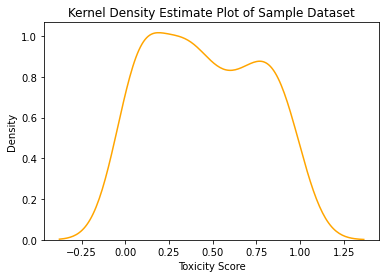

In [180]:
sorted_sample = df_sample_updated.sort_values('toxicity_score')
scores = list(sorted_sample['toxicity_score'])
ax4 = sns.kdeplot(data=scores, color="orange")
ax4.set(xlabel='Toxicity Score', ylabel='Density', title="Kernel Density Estimate Plot of Sample Dataset")
plt.show()

In [181]:
df_sample_updated.to_csv('analyzed_test_comments.csv', encoding='utf-8')

## Results

The results of my thresholds lead to a lower classifed toxic comments compared to my own grade toxic comments. I acknowledge that there is bias in that I didn't create any extremely offensive comments since this is still schoolwork. It is a relatively small dataset which isn't the best at finding biases, however I was able to make different observations in terms of scores that I thought were offensive. 

In [182]:
find_toxicity_score("you deserve nothing less but the most dull and boring life because you are as sharp as a skipping stone")

0.7344555

In [183]:
find_toxicity_score("holy crap")

0.7060645

For instance, I classified the first comment as being toxic while scoring holy crap as non-toxic. My threshold caught this and categorized it as toxic. Based on the context it could be considered toxic/non-toxic. Perspective API probably just finds certain keywords to classify them as being toxic. In this case, "crap" in "holy_crap" has a bad connation which is why its a false positive. 

In [184]:
find_toxicity_score("chink")

0.29163063

In [185]:
find_toxicity_score("stupid")

0.7060645

However, false negatives do exist in Perspective API. The comment above is much worse than the comment below it but the scores are around 0.4 away, with one being classified as non-toxic and the other being classified as toxic even though it is relatively harmless. Although I wasn't able to answer this question, I wonder if popular words with bad connotations have a higher chance of being classified as false positives while less popular words with bad connotations have a higher chance of being classified as false negatives. This doesn't prove or disaprove my previous hypothesis on how curse words/words with bad connotations lead to higher weight in terms of toxicity score of comments despite not looking at context. However, I feel that for the most part, Perspective API is accurate enough to categorize comments as being non-toxic, toxic, and severely toxic. 